# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image


# Import Data & Rename Columns

In [2]:
df = pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_Short = df[['Income','Spending_Score']]
df_Short.head()

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Elbow Method to Indetify Clusters

In [5]:
import sklearn.cluster as cluster

## The WSS formula
This image is from [here](https://www.youtube.com/watch?v=ht7geyMAFfA)

![Alt text](./Elbow%20method/2.png)

## Run Cluster Analysis 12 times

- We run the Cluster Analysis using Cluster as 1 till 12. Also, we store the WSS Scores. The WSS score will be used to create the Elbow Plot
- WSS = Within-Cluster-Sum of Squared

- `NOTE`:The Elbow method has to run Kmeans algorithm 1 - kmax (which is when the K == #of point) or anumber we determine

In [7]:
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

    

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

* `K = range(1, 12)`: This line defines a range of values from 1 to 11 (inclusive) and assigns it to the variable K. These values represent the number of clusters that will be evaluated in the K-means clustering algorithm.

* `wss = []`: This line initializes an empty list called wss to store the WSS values calculated for each value of k.

* `for k in K:`: This line starts a loop that iterates over each value of k in the range defined by K.

* `kmeans = cluster.KMeans(n_clusters=k, init="k-means++")`: This line creates an instance of the KMeans clustering algorithm from the sklearn.cluster module. It specifies the number of clusters (n_clusters) as k and the initialization method (init) as "`k-means++`", which is a smart initialization technique that improves the convergence of the algorithm.

* `kmeans = kmeans.fit(df_Short)`: This line fits the K-means model to the dataset df_Short. It means that the algorithm will learn the cluster centers based on the data.

* `wss_iter = kmeans.inertia_`: This line calculates the WSS for the current value of k. The WSS is obtained from the inertia_ attribute of the K-means model. The inertia represents the sum of squared distances between each sample and its closest centroid within a cluster.

* `wss.append(wss_iter)`: This line appends the calculated WSS value for the current k to the wss list.

## We Store the Number of clusters along with their WSS Scores in a DataFrame

In [8]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37239.835542
6,7,30273.394312
7,8,25028.020475
8,9,21829.135639
9,10,19649.596583


# Plot Elbow Plot

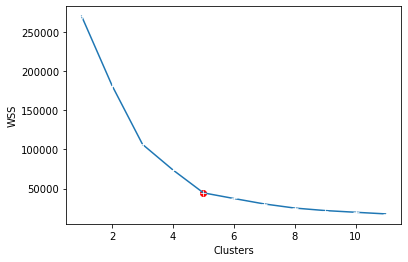

In [13]:
# Plot the line plot
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 5 Clusters

# Add a dot at x=5
plt.scatter(x=5, y=mycenters.loc[mycenters['Clusters'] == 5, 'WSS'], color='red')

# Show the plot
plt.show()

### -- 5 Clusters Identified as per Elbow Method

# Silhouette Method to Indentify Clusters

In [14]:
import sklearn.metrics as metrics

In [15]:
SK = range(3,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    score = metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 3 is 0.46761358158775423


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 4 is 0.4931963109249047


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 5 is 0.553931997444648


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 6 is 0.53976103063432


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 7 is 0.5321706886465517


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 8 is 0.4573261175268683


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 9 is 0.4565077334305075


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 10 is 0.4524923791729668


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 11 is 0.432531674502324


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for k(clusters) = 12 is 0.4254858960373971


In [16]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,3,0.467614
1,4,0.493196
2,5,0.553932
3,6,0.539761
4,7,0.532171
5,8,0.457326
6,9,0.456508
7,10,0.452492
8,11,0.432532
9,12,0.425486


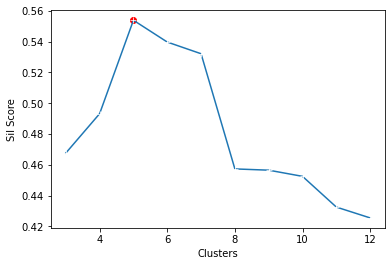

In [18]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")
plt.scatter(x=5, y=sil_centers.loc[sil_centers['Clusters'] == 5, 'Sil Score'], color='red')
plt.show()


#### -- Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

# Perform K-Mean Clustering with 5 Clusters

In [21]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Plot Clusters on Chart

In [22]:
df['Clusters'] = kmeans.labels_


In [23]:
kmeans.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

<AxesSubplot:xlabel='Spending_Score', ylabel='Income'>

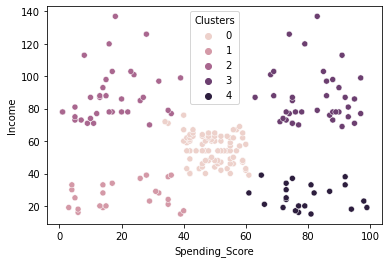

In [26]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)


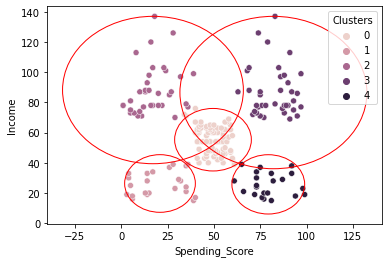

In [27]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)
# Get unique cluster labels
cluster_labels = df['Clusters'].unique()

# Iterate over each cluster
for label in cluster_labels:
    # Get points of the current cluster
    cluster_points = df[df['Clusters'] == label]
    
    # Calculate the centroid of the cluster
    centroid_x = cluster_points['Spending_Score'].mean()
    centroid_y = cluster_points['Income'].mean()
    
    # Calculate the radius of the circle
    radius = max(cluster_points['Spending_Score'].max() - centroid_x, cluster_points['Income'].max() - centroid_y)
    
    # Draw a circle around the cluster
    circle = plt.Circle((centroid_x, centroid_y), radius, color='red', fill=False)
    plt.gca().add_patch(circle)

# Show the plot
plt.show()

# The END

This was completed following [this video](https://www.youtube.com/watch?v=zQfEc7vA1gU&t=328s)